In [1]:
from gemma_utils import *
experiment = create_gemma_experiment()
print("✅ Experiment created with lazy loading - no models loaded yet!")

print_model_structure(experiment)

/Users/andrewgomes/Documents/LLMConstructions/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All required packages imported successfully!
✅ Experiment created with lazy loading - no models loaded yet!
Model structure:
Loading Gemma 2 model and tokenizer...


`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 3/3 [00:00<00:00, 52.92it/s]


Loaded pretrained model google/gemma-2-2b into HookedTransformer
✅ Model and tokenizer loaded successfully!
Model name: gemma-2-2b
Number of layers: 26
Hidden dimension: 2304
Number of attention heads: 8

Blocks structure (Block 0 of 26):
TransformerBlock(
  (ln1): RMSNormPre(
    (hook_scale): HookPoint()
    (hook_normalized): HookPoint()
  )
  (ln1_post): RMSNorm(
    (hook_scale): HookPoint()
    (hook_normalized): HookPoint()
  )
  (ln2): RMSNormPre(
    (hook_scale): HookPoint()
    (hook_normalized): HookPoint()
  )
  (ln2_post): RMSNorm(
    (hook_scale): HookPoint()
    (hook_normalized): HookPoint()
  )
  (attn): GroupedQueryAttention(
    (hook_k): HookPoint()
    (hook_q): HookPoint()
    (hook_v): HookPoint()
    (hook_z): HookPoint()
    (hook_attn_scores): HookPoint()
    (hook_pattern): HookPoint()
    (hook_result): HookPoint()
    (hook_rot_k): HookPoint()
    (hook_rot_q): HookPoint()
  )
  (mlp): GatedMLP(
    (hook_pre): HookPoint()
    (hook_pre_linear): HookPoint

Analyzing and plotting similarities for 3 sentences...
Loading all SAEs...
Loading all SAEs...


Loading SAEs:   0%|          | 0/26 [00:00<?, ?it/s]/Users/andrewgomes/Documents/LLMConstructions/.venv/lib/python3.13/site-packages/sae_lens/saes/sae.py:249: UserWarning: 
This SAE has non-empty model_from_pretrained_kwargs. 
For optimal performance, load the model like so:
model = HookedSAETransformer.from_pretrained_no_processing(..., **cfg.model_from_pretrained_kwargs)
  warnings.warn(
Loading SAEs:   4%|▍         | 1/26 [00:00<00:20,  1.24it/s]/Users/andrewgomes/Documents/LLMConstructions/.venv/lib/python3.13/site-packages/sae_lens/saes/sae.py:249: UserWarning: 
This SAE has non-empty model_from_pretrained_kwargs. 
For optimal performance, load the model like so:
model = HookedSAETransformer.from_pretrained_no_processing(..., **cfg.model_from_pretrained_kwargs)
  warnings.warn(
Loading SAEs: 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]



✅ All SAEs loaded successfully!


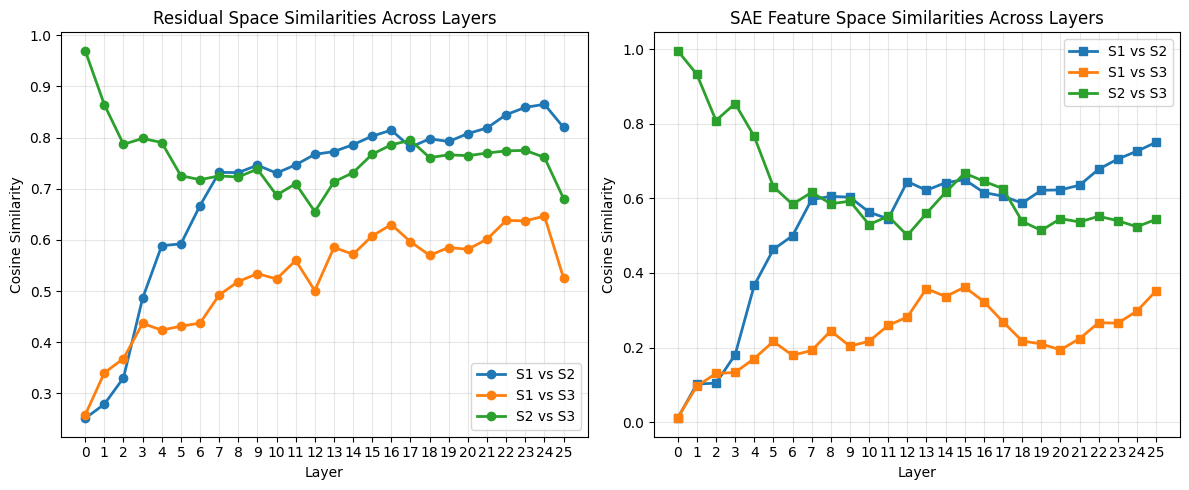

In [2]:
test_sentences = [
    "That was easy",
    "That was a piece of cake",
    "That was a cake"
]
plot_sentence_similarities(experiment, test_sentences, include_sae=True)

Analyzing and plotting similarities for 3 sentences...


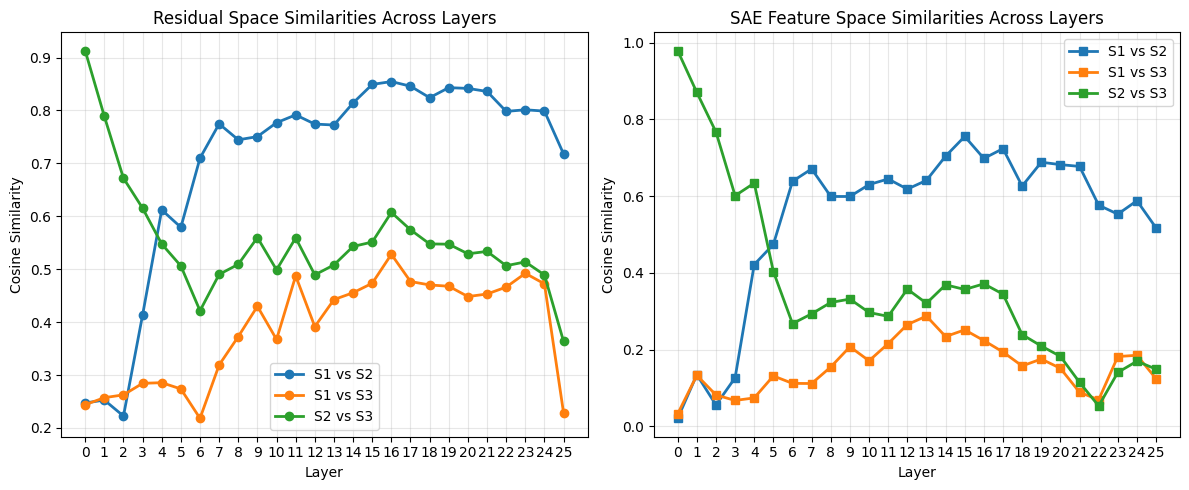

In [3]:
test_sentences = [
    "He died",
    "He kicked the bucket",
    "The bucket"
]
plot_sentence_similarities(experiment, test_sentences, include_sae=True)

In [3]:
_ = find_similar_tokens_by_embedding(experiment, ' kicked', top_k=20)

Target token: ' kicked' (ID: 38621)
Embedding matrix shape: torch.Size([256000, 2304])
Target embedding shape: torch.Size([2304])

Top 20 tokens most similar to ' kicked':
------------------------------------------------------------
 1. Token ID  38621: ' kicked' (similarity: 1.0000)
 2. Token ID  47971: ' kicks' (similarity: 0.7766)
 3. Token ID  57692: ' kicking' (similarity: 0.7603)
 4. Token ID  12656: ' kick' (similarity: 0.7388)
 5. Token ID  41926: 'kick' (similarity: 0.7089)
 6. Token ID  43486: ' Kick' (similarity: 0.6677)
 7. Token ID 231188: ' KICK' (similarity: 0.6665)
 8. Token ID  59477: 'Kick' (similarity: 0.6664)
 9. Token ID 201584: 'kicks' (similarity: 0.5935)
10. Token ID 197837: ' Kicks' (similarity: 0.5630)
11. Token ID 186808: ' booted' (similarity: 0.5117)
12. Token ID 165613: ' kickoff' (similarity: 0.5108)
13. Token ID 229633: 'キック' (similarity: 0.4933)
14. Token ID 144027: ' kicker' (similarity: 0.4575)
15. Token ID 240148: '踢' (similarity: 0.4179)
16. Token I

Computing similarities...


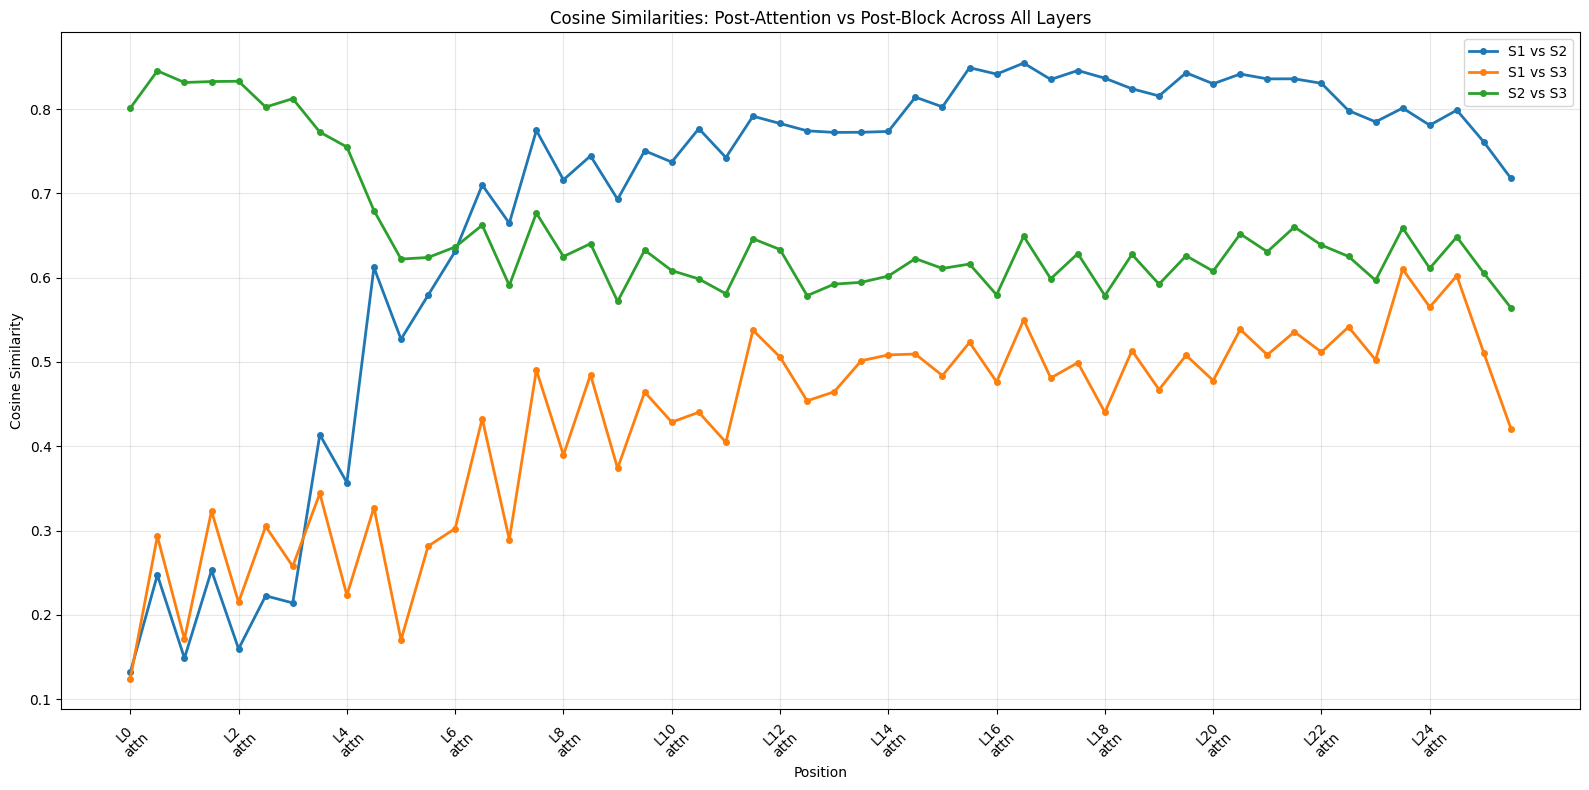

In [ ]:
test_sentences = [
    "He died",
    "He kicked the bucket",
    "He kicked the buckets"
]
plot_dual_position_similarities(experiment, test_sentences)

Computing similarities...


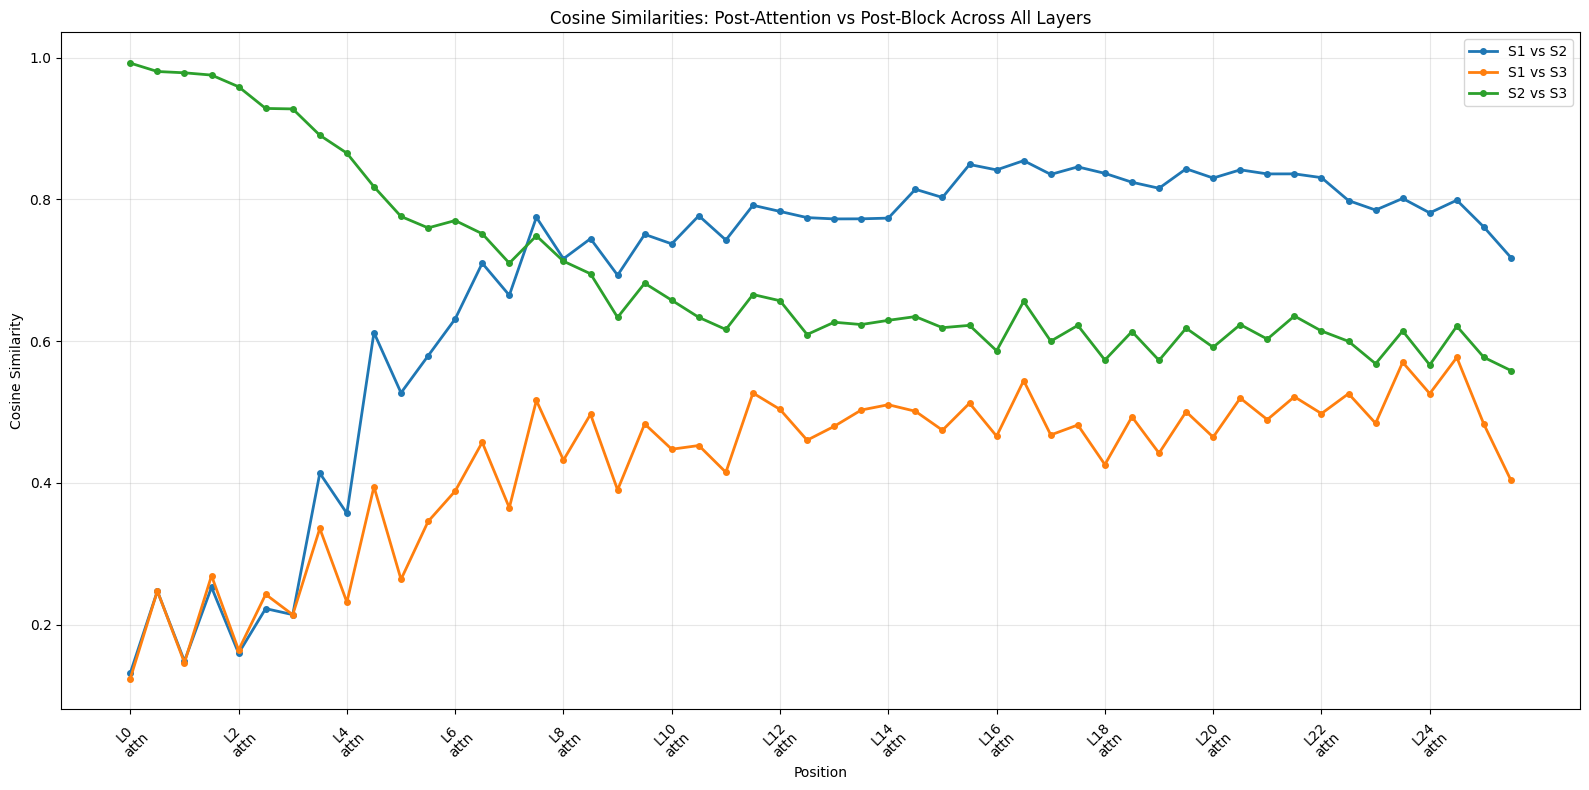

In [6]:
test_sentences = [
    "He died",
    "He kicked the bucket",
    "He kicked a bucket"
]
plot_dual_position_similarities(experiment, test_sentences)

Computing similarities...


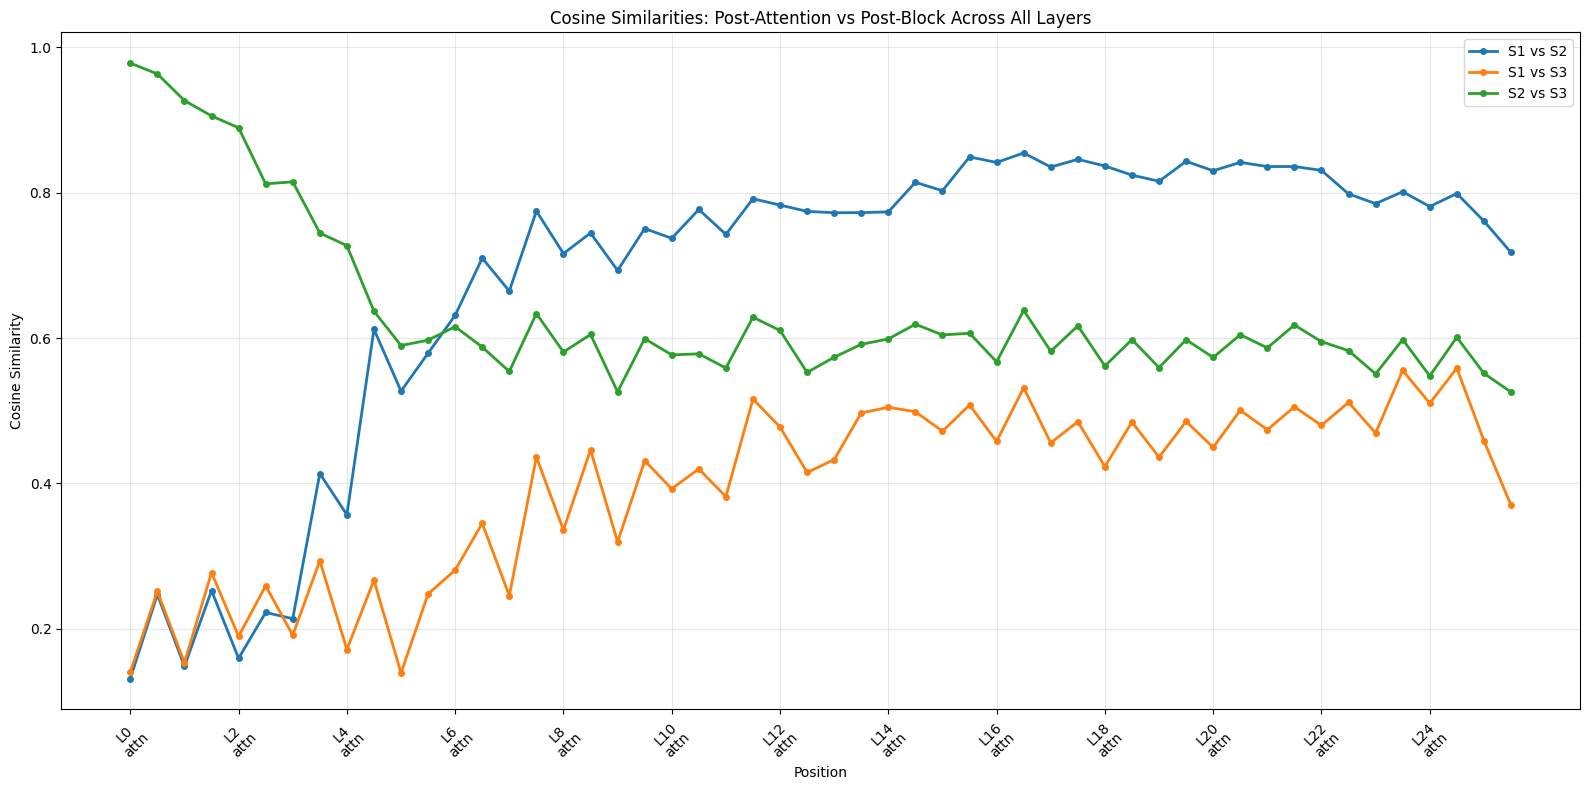

In [ ]:
test_sentences = [
    "He died",
    "He kicked the bucket",
    "He booted the bucket"
]
plot_dual_position_similarities(experiment, test_sentences)

In [2]:
# Analyze sentences with comprehensive hooks
sentences = ["He kicked the buckets", "He kicked the bucket"]
result = comprehensive_forward_pass_analysis(experiment, sentences)

# Focus on layer 0
print_activation_summary(result, layer_idx=0)

# token_acts = get_token_activations_at_position(result, sentence_idx=0, token_position=2, layer_idx=5)

Comprehensive forward pass analysis for 2 sentences across 26 layers...

Tokenization Details:

Sentence 1: He kicked the buckets
Token IDs: [2, 1949, 38621, 573, 75123]
Tokens: ['<bos>', 'He', ' kicked', ' the', ' buckets']

Sentence 2: He kicked the bucket
Token IDs: [2, 1949, 38621, 573, 24951]
Tokens: ['<bos>', 'He', ' kicked', ' the', ' bucket']

Registering hooks for 26 layers...
Registered 572 hooks total
Running forward pass...
✅ Captured 416 activation tensors

Activation Summary:
----------------------------------------

ATTENTION:
  Layer 0: 8 hooks - ['hook_q', 'hook_k', 'hook_v', 'hook_rot_q', 'hook_rot_k', 'hook_attn_scores', 'hook_pattern', 'hook_z']

MLP:
  Layer 0: 3 hooks - ['hook_pre', 'hook_pre_linear', 'hook_post']

BLOCK_LEVEL:
  Layer 0: 5 hooks - ['hook_resid_pre', 'hook_attn_out', 'hook_resid_mid', 'hook_mlp_out', 'hook_resid_post']

Activation Analysis Summary
Sentences analyzed: 2
Focusing on Layer 0

LAYER 0

ATTENTION:
  hook_q               -> torch.Size([

In [3]:
analyze_final_token_differences(result, layers=[0, 1, 2, 3, 4])

Final Token Analysis: 5 layers
S0: He kicked the buckets
S1: He kicked the bucket

Final token positions: S0[4], S1[4]

LAYER 0
--------------------
hook_resid_pre  ||s0||:  87.94  ||s1||:  81.81  cos_sim:  0.796
hook_attn_out   ||s0||:  47.10  ||s1||:  42.10  cos_sim:  0.961
hook_resid_mid  ||s0||:  85.42  ||s1||:  82.74  cos_sim:  0.801
hook_mlp_out    ||s0||:  49.64  ||s1||:  44.48  cos_sim:  0.680
hook_resid_post ||s0||:  90.06  ||s1||:  89.44  cos_sim:  0.845

Attention Patterns (8 heads) - Last Row Only:
  Head 0:
    S0 last row: [0.446, 0.001, 0.099, 0.388, 0.066]
    S1 last row: [0.336, 0.001, 0.117, 0.459, 0.087]

  Head 1:
    S0 last row: [0.836, 0.007, 0.012, 0.002, 0.143]
    S1 last row: [0.876, 0.003, 0.007, 0.001, 0.112]

  Head 2:
    S0 last row: [0.021, 0.276, 0.419, 0.034, 0.250]
    S1 last row: [0.058, 0.362, 0.320, 0.044, 0.216]

  Head 3:
    S0 last row: [0.578, 0.223, 0.036, 0.105, 0.058]
    S1 last row: [0.392, 0.357, 0.066, 0.114, 0.071]

  Head 4:
    S0

In [4]:
# Add this cell to debug hook registration

def debug_hook_registration(experiment):
    """Debug which hooks are actually registered and firing"""
    model = experiment.model  # Changed from experiment.models['gemma']
    
    # Check all available hooks
    print("Available hooks in attention layer 0:")
    attn_layer = model.blocks[0].attn
    for name, module in attn_layer.named_modules():
        if hasattr(module, 'name') and 'hook' in str(module):
            print(f"  {name}: {module}")
    
    # Test hook firing
    hook_fired = {}
    
    def make_debug_hook(hook_name):
        def debug_hook(activation, hook):
            hook_fired[hook_name] = True
            print(f"🔥 {hook_name} fired with shape: {activation.shape}")
            return activation
        return debug_hook
    
    # Register debug hooks for all attention hooks
    hooks = []
    for hook_name in ['hook_q', 'hook_k', 'hook_v', 'hook_z', 'hook_result', 'hook_attn_scores', 'hook_pattern']:
        try:
            hook_point = getattr(attn_layer, hook_name)
            hooks.append(hook_point.add_hook(make_debug_hook(hook_name)))
            print(f"✅ Registered debug hook for {hook_name}")
        except AttributeError:
            print(f"❌ Could not find {hook_name}")
    
    # Run a simple forward pass
    test_tokens = model.to_tokens("Test sentence")
    _ = model(test_tokens)
    
    # Clean up
    for hook in hooks:
        hook.remove()
    
    print(f"\nHooks that fired: {list(hook_fired.keys())}")
    return hook_fired

# Run the debug
debug_results = debug_hook_registration(experiment)

Available hooks in attention layer 0:
  : GroupedQueryAttention(
  (hook_k): HookPoint()
  (hook_q): HookPoint()
  (hook_v): HookPoint()
  (hook_z): HookPoint()
  (hook_attn_scores): HookPoint()
  (hook_pattern): HookPoint()
  (hook_result): HookPoint()
  (hook_rot_k): HookPoint()
  (hook_rot_q): HookPoint()
)
✅ Registered debug hook for hook_q
✅ Registered debug hook for hook_k
✅ Registered debug hook for hook_v
✅ Registered debug hook for hook_z
✅ Registered debug hook for hook_result
✅ Registered debug hook for hook_attn_scores
✅ Registered debug hook for hook_pattern
🔥 hook_q fired with shape: torch.Size([1, 3, 8, 256])
🔥 hook_k fired with shape: torch.Size([1, 3, 4, 256])
🔥 hook_v fired with shape: torch.Size([1, 3, 4, 256])
🔥 hook_attn_scores fired with shape: torch.Size([1, 8, 3, 3])
🔥 hook_pattern fired with shape: torch.Size([1, 8, 3, 3])
🔥 hook_z fired with shape: torch.Size([1, 3, 8, 256])


AttributeError: 'NoneType' object has no attribute 'remove'